#### Capstone Project: 

Student name: Milena Afeworki   
Student pace: full time   
Scheduled project review date/time: 07/09/2021 @ 10:15 PT   
Instructor name: Abhineet Kulkarni   
Blog post URL:

# Bridges Condition Classificaiton Model

A major objective of a bridge management system is to assist
bridge managers in making consistent and cost-effective decisions related to maintenance and rehabilitation of bridges. The
decision making, either at the network level or at the project
level, is based on current and future bridge conditions. Therefore, it is essential for a bridge management system to be
capable of accurately predicting future bridge conditions. 


Historical bridge condition rating data from the FHWA National Bridge Inventory (NBI) (FHWA,
1995; FHWA 2020b) are used in conjunction with climate data to develop machine learning
models. The research methodology employed is a deep learning-aided bridge deterioration
modeling approach (Liu et al., 2021; Liu and Zhang, 2020). The model development has expanded
the training datasets from a single State to the entire Nation.

## The Business Problem

## Data Understanding

 The 2020 climatic data has been added. InfoBridge™ climate data is obtained from NASA’s Modern-Era Retrospective analysis for Research and Applications Version 2 (MERRA-2) data, which is currently available from January 1, 1980 to December 31, 2020.
 
 Physical weathering is caused by the effects of changing temperature on rocks, causing the rock to break apart. The process is sometimes assisted by water. ... Freeze-thaw occurs when water continually seeps into cracks, freezes and expands, eventually breaking the rock apart.

In [1]:
#Importing all the necessary library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# sns.set_style('whitegrid')

from sklearn.metrics import plot_confusion_matrix

from xgboost import XGBClassifier
sns.set_style('darkgrid')

In [2]:
pd.options.display.max_columns = None

## Obtain Data

In [3]:
#Select columns to include from csv file 
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', 
           '108C - Deck Protection Code',
           '20 - Toll Status',
       '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days']


In [4]:
new_df = pd.read_csv('C:/Users/milen/Flatiron-April05/Capstone Project/BridgesExport_August_19_2021_07_08_24.csv',error_bad_lines=False, sep = ',', header = 0)
new_df.head()

b'Skipping line 70: expected 11 fields, saw 13\nSkipping line 485: expected 11 fields, saw 13\nSkipping line 863: expected 11 fields, saw 13\nSkipping line 2009: expected 11 fields, saw 13\nSkipping line 2373: expected 11 fields, saw 13\nSkipping line 2380: expected 11 fields, saw 13\nSkipping line 2388: expected 11 fields, saw 13\nSkipping line 4141: expected 11 fields, saw 13\nSkipping line 4223: expected 11 fields, saw 13\nSkipping line 5789: expected 11 fields, saw 13\nSkipping line 6447: expected 11 fields, saw 13\nSkipping line 6772: expected 11 fields, saw 13\nSkipping line 7618: expected 11 fields, saw 13\nSkipping line 8167: expected 11 fields, saw 13\nSkipping line 8270: expected 11 fields, saw 13\nSkipping line 8286: expected 11 fields, saw 13\nSkipping line 8294: expected 11 fields, saw 13\nSkipping line 8297: expected 11 fields, saw 13\nSkipping line 9908: expected 11 fields, saw 13\nSkipping line 12415: expected 11 fields, saw 13\nSkipping line 12419: expected 11 fields, 

b'Skipping line 197944: expected 11 fields, saw 13\nSkipping line 198624: expected 11 fields, saw 13\nSkipping line 198996: expected 11 fields, saw 13\nSkipping line 199148: expected 11 fields, saw 13\nSkipping line 199206: expected 11 fields, saw 13\nSkipping line 199370: expected 11 fields, saw 13\nSkipping line 199545: expected 11 fields, saw 13\nSkipping line 199851: expected 11 fields, saw 13\nSkipping line 199875: expected 11 fields, saw 13\nSkipping line 199889: expected 11 fields, saw 13\nSkipping line 199892: expected 11 fields, saw 13\nSkipping line 199919: expected 11 fields, saw 13\nSkipping line 199985: expected 11 fields, saw 13\nSkipping line 199986: expected 11 fields, saw 13\nSkipping line 200093: expected 11 fields, saw 13\nSkipping line 200273: expected 11 fields, saw 13\nSkipping line 200385: expected 11 fields, saw 13\nSkipping line 200717: expected 11 fields, saw 13\nSkipping line 201100: expected 11 fields, saw 13\nSkipping line 201323: expected 11 fields, saw 13

b'Skipping line 465921: expected 11 fields, saw 13\nSkipping line 466238: expected 11 fields, saw 13\nSkipping line 469351: expected 11 fields, saw 13\nSkipping line 470728: expected 11 fields, saw 13\nSkipping line 470736: expected 11 fields, saw 13\nSkipping line 470839: expected 11 fields, saw 13\nSkipping line 471173: expected 11 fields, saw 13\nSkipping line 471415: expected 11 fields, saw 13\nSkipping line 473781: expected 11 fields, saw 13\nSkipping line 473896: expected 11 fields, saw 13\nSkipping line 474111: expected 11 fields, saw 13\nSkipping line 474243: expected 11 fields, saw 13\nSkipping line 477724: expected 11 fields, saw 13\nSkipping line 478876: expected 11 fields, saw 13\nSkipping line 480847: expected 11 fields, saw 13\nSkipping line 482975: expected 11 fields, saw 13\nSkipping line 482980: expected 11 fields, saw 13\nSkipping line 484143: expected 11 fields, saw 13\nSkipping line 487691: expected 11 fields, saw 13\nSkipping line 491954: expected 11 fields, saw 13

1 - State Name 8 - Structure Number       22 - Owner Agency  \
0  '1 - Alabama'      080103000001007   'U.S. Forest Service'   
1  '1 - Alabama'      080106000001009   'U.S. Forest Service'   
2  '1 - Alabama'      020222           'State Highway Agency'   
3  '1 - Alabama'      021152           'State Highway Agency'   
4  '1 - Alabama'      021480           'State Highway Agency'   

  107 - Deck Structure Type Code 108A - Wearing Surface Type Code  \
0                            'N'                              'N'   
1                            'N'                              'N'   
2                            'N'                              'N'   
3                            '1'                              '0'   
4                            '1'                              '0'   

  108B - Membrane Type Code 108C - Deck Protection Code 20 - Toll Status  \
0                       'N'                         'N'              '3'   
1                       'N'                         'N'              '3'   
2                       'N'                         'N'              '3'   
3                       '0'                         '0'              '3'   
4                       '0'                         '0'              '3'   

   109 - Average Daily Truck Traffic (Percent ADT)  \
0                                              NaN   
1                                              NaN   
2                                             14.0   
3                                             20.0   
4                                             35.0   

   Number of Freeze-Thaw Cycles  Number of Snowfall Days  
0                           NaN                      NaN  
1                           NaN                      NaN  
2                           6.0                      8.0  
3                           NaN                      NaN  
4                          14.0                      0.0

In [5]:
new_df.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days'],
      dtype='object')

In [6]:
new_df.shape

(617127, 11)

In [7]:
#Select columns to read from CSV
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '27 - Year Built', '29 - Average Daily Traffic',
       '43A - Main Design Mat Type Value',
       '43B - Main Construction Design Value',
       '45 - Number of Spans in Main Unit', '49 - Structure Length (ft)',
       '6A - Features Intersected', '7 - Facility Carried By Structure',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       'CAT29 - Deck Area (sq.ft)']

In [8]:
#read csv
df = pd.read_csv('C:/Users/milen/Flatiron-April05/Capstone Project/Bridge_data.txt', error_bad_lines=False, sep = ',', header = 0)
df.head()

b'Skipping line 145: expected 15 fields, saw 17\nSkipping line 216: expected 15 fields, saw 16\nSkipping line 271: expected 15 fields, saw 16\nSkipping line 438: expected 15 fields, saw 17\nSkipping line 795: expected 15 fields, saw 16\nSkipping line 921: expected 15 fields, saw 17\nSkipping line 1323: expected 15 fields, saw 16\nSkipping line 2064: expected 15 fields, saw 17\nSkipping line 2103: expected 15 fields, saw 16\nSkipping line 2183: expected 15 fields, saw 16\nSkipping line 2187: expected 15 fields, saw 16\nSkipping line 2356: expected 15 fields, saw 17\nSkipping line 2419: expected 15 fields, saw 17\nSkipping line 2426: expected 15 fields, saw 17\nSkipping line 2446: expected 15 fields, saw 16\nSkipping line 2534: expected 15 fields, saw 16\nSkipping line 2718: expected 15 fields, saw 17\nSkipping line 2972: expected 15 fields, saw 16\nSkipping line 3102: expected 15 fields, saw 16\nSkipping line 3208: expected 15 fields, saw 16\nSkipping line 3283: expected 15 fields, saw 

b'Skipping line 133995: expected 15 fields, saw 16\nSkipping line 134056: expected 15 fields, saw 16\nSkipping line 134064: expected 15 fields, saw 16\nSkipping line 134088: expected 15 fields, saw 16\nSkipping line 134089: expected 15 fields, saw 17\nSkipping line 134111: expected 15 fields, saw 17\nSkipping line 134115: expected 15 fields, saw 16\nSkipping line 134142: expected 15 fields, saw 16\nSkipping line 134167: expected 15 fields, saw 16\nSkipping line 134190: expected 15 fields, saw 16\nSkipping line 134205: expected 15 fields, saw 16\nSkipping line 134242: expected 15 fields, saw 16\nSkipping line 134252: expected 15 fields, saw 16\nSkipping line 134263: expected 15 fields, saw 16\nSkipping line 134270: expected 15 fields, saw 16\nSkipping line 134279: expected 15 fields, saw 16\nSkipping line 134308: expected 15 fields, saw 16\nSkipping line 134320: expected 15 fields, saw 16\nSkipping line 134340: expected 15 fields, saw 16\nSkipping line 134348: expected 15 fields, saw 17

b'Skipping line 270320: expected 15 fields, saw 16\nSkipping line 270423: expected 15 fields, saw 16\nSkipping line 270451: expected 15 fields, saw 16\nSkipping line 270461: expected 15 fields, saw 16\nSkipping line 270497: expected 15 fields, saw 16\nSkipping line 270649: expected 15 fields, saw 16\nSkipping line 270672: expected 15 fields, saw 16\nSkipping line 270673: expected 15 fields, saw 16\nSkipping line 271388: expected 15 fields, saw 16\nSkipping line 274267: expected 15 fields, saw 16\nSkipping line 274290: expected 15 fields, saw 16\nSkipping line 274292: expected 15 fields, saw 16\nSkipping line 274429: expected 15 fields, saw 16\nSkipping line 274455: expected 15 fields, saw 17\nSkipping line 274486: expected 15 fields, saw 17\nSkipping line 274489: expected 15 fields, saw 17\nSkipping line 274507: expected 15 fields, saw 17\nSkipping line 274512: expected 15 fields, saw 17\nSkipping line 274513: expected 15 fields, saw 17\nSkipping line 274514: expected 15 fields, saw 17

b'Skipping line 404913: expected 15 fields, saw 16\nSkipping line 404914: expected 15 fields, saw 16\nSkipping line 404915: expected 15 fields, saw 16\nSkipping line 404942: expected 15 fields, saw 16\nSkipping line 404950: expected 15 fields, saw 16\nSkipping line 404959: expected 15 fields, saw 16\nSkipping line 404961: expected 15 fields, saw 16\nSkipping line 404970: expected 15 fields, saw 16\nSkipping line 405010: expected 15 fields, saw 16\nSkipping line 405033: expected 15 fields, saw 16\nSkipping line 405040: expected 15 fields, saw 16\nSkipping line 405047: expected 15 fields, saw 16\nSkipping line 405149: expected 15 fields, saw 16\nSkipping line 405236: expected 15 fields, saw 16\nSkipping line 405238: expected 15 fields, saw 16\nSkipping line 405240: expected 15 fields, saw 17\nSkipping line 405248: expected 15 fields, saw 16\nSkipping line 405265: expected 15 fields, saw 16\nSkipping line 405267: expected 15 fields, saw 17\nSkipping line 405269: expected 15 fields, saw 16

b'Skipping line 540437: expected 15 fields, saw 16\nSkipping line 540512: expected 15 fields, saw 16\nSkipping line 540625: expected 15 fields, saw 16\nSkipping line 540628: expected 15 fields, saw 16\nSkipping line 540629: expected 15 fields, saw 16\nSkipping line 540712: expected 15 fields, saw 16\nSkipping line 541429: expected 15 fields, saw 16\nSkipping line 541986: expected 15 fields, saw 16\nSkipping line 542156: expected 15 fields, saw 16\nSkipping line 542609: expected 15 fields, saw 16\nSkipping line 542611: expected 15 fields, saw 16\nSkipping line 542698: expected 15 fields, saw 16\nSkipping line 542712: expected 15 fields, saw 16\nSkipping line 544095: expected 15 fields, saw 16\nSkipping line 544097: expected 15 fields, saw 16\nSkipping line 544118: expected 15 fields, saw 16\nSkipping line 544168: expected 15 fields, saw 16\nSkipping line 544296: expected 15 fields, saw 17\nSkipping line 544310: expected 15 fields, saw 16\nSkipping line 544325: expected 15 fields, saw 17

1 - State Name 8 - Structure Number        22 - Owner Agency  \
0  '1 - Alabama'      020260           'County Highway Agency'   
1  '1 - Alabama'      007641            'State Highway Agency'   
2  '1 - Alabama'      009096           'County Highway Agency'   
3  '1 - Alabama'      019608           'County Highway Agency'   
4  '1 - Alabama'      002529            'State Highway Agency'   

          3 - County Name  27 - Year Built  29 - Average Daily Traffic  \
0  '069 - Houston County'             1960                      1654.0   
1  '005 - Barbour County'             1962                     13980.0   
2  '005 - Barbour County'             1967                       260.0   
3  '113 - Russell County'             2005                        50.0   
4  '005 - Barbour County'             1941                      4495.0   

  43A - Main Design Mat Type Value 43B - Main Construction Design Value  \
0                       'Concrete'                            'Culvert'   
1               'Steel Continuous'      'Stringer/Multi-beam or Girder'   
2                       'Concrete'                            'Culvert'   
3                 'Wood or Timber'      'Stringer/Multi-beam or Girder'   
4               'Steel Continuous'      'Stringer/Multi-beam or Girder'   

   45 - Number of Spans in Main Unit  49 - Structure Length (ft)  \
0                                  2                        24.6   
1                                  4                      1131.9   
2                                  3                        26.2   
3                                  2                        24.0   
4                                 12                       266.1   

    6A - Features Intersected 7 - Facility Carried By Structure  \
0  'SAUNDERS BRANCH         '              'W. SAUNDERS RD.   '   
1  'CHATTAHOOCHEE RIVER     '              'US  82 MP 239.816 '   
2  'BLACKS BRANCH           '              'LEROY RD          '   
3  'SNAKE CREEK             '              'WILDMAN BOTTOM    '   
4  'WHITE OAK CREEK         '              'US 431 MP 57.766  '   

  CAT10 - Bridge Condition  Bridge Age (yr)  CAT29 - Deck Area (sq.ft)  
0                   'Good'               61                      540.9  
1                   'Fair'               59                    74642.3  
2                   'Fair'               54                      731.9  
3                   'Fair'               16                      385.0  
4                   'Fair'               80                     7769.3

In [9]:
df.shape

(601036, 15)

In [10]:
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '3 - County Name', '9 - Location', '16 - Latitude (decimal)',
       '17 - Longitude (decimal)', '21 - Maintenance Responsibility',
       '106 - Year Reconstructed', '34 - Skew Angle (degrees)',
       '48 - Length of Maximum Span (ft)',
       '51 - Bridge Roadway Width Curb to Curb (ft)',
       '52 - Deck Width - Out to Out (ft)', '59 - Superstructure Condition',
       '60 - Substructure Condition', '58 - Deck Condition']

In [11]:
df1 = pd.read_csv('C:/Users/milen/Flatiron-April05/Capstone Project/Bridges_location_data.txt',error_bad_lines=False,
                 sep = ',', header = 0)
df1.head()

b'Skipping line 91: expected 16 fields, saw 18\nSkipping line 106: expected 16 fields, saw 18\nSkipping line 118: expected 16 fields, saw 18\nSkipping line 140: expected 16 fields, saw 18\nSkipping line 225: expected 16 fields, saw 18\nSkipping line 266: expected 16 fields, saw 18\nSkipping line 274: expected 16 fields, saw 18\nSkipping line 282: expected 16 fields, saw 18\nSkipping line 286: expected 16 fields, saw 18\nSkipping line 292: expected 16 fields, saw 18\nSkipping line 294: expected 16 fields, saw 18\nSkipping line 349: expected 16 fields, saw 18\nSkipping line 380: expected 16 fields, saw 18\nSkipping line 387: expected 16 fields, saw 18\nSkipping line 391: expected 16 fields, saw 18\nSkipping line 403: expected 16 fields, saw 18\nSkipping line 446: expected 16 fields, saw 18\nSkipping line 461: expected 16 fields, saw 18\nSkipping line 462: expected 16 fields, saw 18\nSkipping line 465: expected 16 fields, saw 18\nSkipping line 472: expected 16 fields, saw 18\nSkipping lin

b'Skipping line 100178: expected 16 fields, saw 18\nSkipping line 101252: expected 16 fields, saw 18\nSkipping line 102087: expected 16 fields, saw 17\nSkipping line 102258: expected 16 fields, saw 18\nSkipping line 102423: expected 16 fields, saw 17\nSkipping line 102628: expected 16 fields, saw 17\nSkipping line 102707: expected 16 fields, saw 17\nSkipping line 102708: expected 16 fields, saw 17\nSkipping line 102710: expected 16 fields, saw 17\nSkipping line 102711: expected 16 fields, saw 17\nSkipping line 102901: expected 16 fields, saw 17\nSkipping line 103016: expected 16 fields, saw 17\nSkipping line 103017: expected 16 fields, saw 17\nSkipping line 103022: expected 16 fields, saw 17\nSkipping line 103436: expected 16 fields, saw 18\nSkipping line 103571: expected 16 fields, saw 18\nSkipping line 103747: expected 16 fields, saw 19\nSkipping line 103759: expected 16 fields, saw 18\nSkipping line 104002: expected 16 fields, saw 18\nSkipping line 104189: expected 16 fields, saw 18

b'Skipping line 199652: expected 16 fields, saw 18\nSkipping line 199655: expected 16 fields, saw 18\nSkipping line 199703: expected 16 fields, saw 18\nSkipping line 199815: expected 16 fields, saw 18\nSkipping line 199861: expected 16 fields, saw 18\nSkipping line 199964: expected 16 fields, saw 18\nSkipping line 199965: expected 16 fields, saw 18\nSkipping line 200004: expected 16 fields, saw 18\nSkipping line 200023: expected 16 fields, saw 18\nSkipping line 200134: expected 16 fields, saw 17\nSkipping line 200414: expected 16 fields, saw 18\nSkipping line 200431: expected 16 fields, saw 18\nSkipping line 201034: expected 16 fields, saw 18\nSkipping line 201157: expected 16 fields, saw 18\nSkipping line 201198: expected 16 fields, saw 18\nSkipping line 201576: expected 16 fields, saw 18\nSkipping line 201614: expected 16 fields, saw 18\nSkipping line 201687: expected 16 fields, saw 18\nSkipping line 201797: expected 16 fields, saw 18\nSkipping line 201824: expected 16 fields, saw 18

b'Skipping line 331442: expected 16 fields, saw 17\nSkipping line 331818: expected 16 fields, saw 18\nSkipping line 332005: expected 16 fields, saw 18\nSkipping line 332232: expected 16 fields, saw 17\nSkipping line 332269: expected 16 fields, saw 18\nSkipping line 332382: expected 16 fields, saw 18\nSkipping line 332532: expected 16 fields, saw 18\nSkipping line 332600: expected 16 fields, saw 18\nSkipping line 332747: expected 16 fields, saw 18\nSkipping line 332954: expected 16 fields, saw 18\nSkipping line 332963: expected 16 fields, saw 18\nSkipping line 332973: expected 16 fields, saw 18\nSkipping line 333019: expected 16 fields, saw 18\nSkipping line 333064: expected 16 fields, saw 18\nSkipping line 333106: expected 16 fields, saw 18\nSkipping line 333116: expected 16 fields, saw 18\nSkipping line 333128: expected 16 fields, saw 18\nSkipping line 333137: expected 16 fields, saw 18\nSkipping line 333139: expected 16 fields, saw 18\nSkipping line 333206: expected 16 fields, saw 18

b'Skipping line 464889: expected 16 fields, saw 17\nSkipping line 466016: expected 16 fields, saw 18\nSkipping line 466378: expected 16 fields, saw 18\nSkipping line 469372: expected 16 fields, saw 18\nSkipping line 470341: expected 16 fields, saw 18\nSkipping line 470655: expected 16 fields, saw 18\nSkipping line 470663: expected 16 fields, saw 18\nSkipping line 471406: expected 16 fields, saw 18\nSkipping line 471466: expected 16 fields, saw 18\nSkipping line 473574: expected 16 fields, saw 18\nSkipping line 473983: expected 16 fields, saw 18\nSkipping line 474126: expected 16 fields, saw 18\nSkipping line 474249: expected 16 fields, saw 18\nSkipping line 477755: expected 16 fields, saw 18\nSkipping line 479028: expected 16 fields, saw 18\nSkipping line 479293: expected 16 fields, saw 18\nSkipping line 480948: expected 16 fields, saw 18\nSkipping line 483232: expected 16 fields, saw 18\nSkipping line 483244: expected 16 fields, saw 18\nSkipping line 484119: expected 16 fields, saw 18

b'Skipping line 596114: expected 16 fields, saw 18\nSkipping line 596115: expected 16 fields, saw 18\nSkipping line 596119: expected 16 fields, saw 18\nSkipping line 596245: expected 16 fields, saw 17\nSkipping line 596260: expected 16 fields, saw 18\nSkipping line 596261: expected 16 fields, saw 18\nSkipping line 596262: expected 16 fields, saw 18\nSkipping line 596271: expected 16 fields, saw 18\nSkipping line 596292: expected 16 fields, saw 18\nSkipping line 596297: expected 16 fields, saw 18\nSkipping line 596299: expected 16 fields, saw 18\nSkipping line 596300: expected 16 fields, saw 18\nSkipping line 596317: expected 16 fields, saw 17\nSkipping line 596390: expected 16 fields, saw 17\nSkipping line 596392: expected 16 fields, saw 17\nSkipping line 596395: expected 16 fields, saw 17\nSkipping line 596413: expected 16 fields, saw 17\nSkipping line 596510: expected 16 fields, saw 17\nSkipping line 597212: expected 16 fields, saw 18\nSkipping line 599260: expected 16 fields, saw 18

1 - State Name 8 - Structure Number       22 - Owner Agency  \
0  '1 - Alabama'      080103000001007   'U.S. Forest Service'   
1  '1 - Alabama'      080106000001009   'U.S. Forest Service'   
2  '1 - Alabama'      020222           'State Highway Agency'   
3  '1 - Alabama'      021152           'State Highway Agency'   
4  '1 - Alabama'      021480           'State Highway Agency'   

            3 - County Name                 9 - Location  \
0  '039 - Covington County'  'CONECUH NATIONAL FOREST  '   
1       '027 - Clay County'  'NATIONAL FOREST          '   
2     '061 - Geneva County'  '1 mi. west of al 52      '   
3  '073 - Jefferson County'  '_11TH AVE                '   
4    '069 - Houston County'  'GA. /ALA .  LINE         '   

   16 - Latitude (decimal)  17 - Longitude (decimal)  \
0                  0.00000                  0.000000   
1                  0.00000                  0.000000   
2                 31.10981                 -9.024917   
3                 33.52243                -33.522430   
4                 31.12305                -85.055270   

  21 - Maintenance Responsibility  106 - Year Reconstructed  \
0                            '64'                       0.0   
1                            '64'                       0.0   
2                             '1'                       0.0   
3                             '1'                       0.0   
4                             '1'                       0.0   

   34 - Skew Angle (degrees)  48 - Length of Maximum Span (ft)  \
0                       20.0                               0.0   
1                       45.0                               0.0   
2                        0.0                               7.9   
3                        0.0                              75.1   
4                       23.0                             274.9   

   51 - Bridge Roadway Width Curb to Curb (ft)  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                         24.9   
4                                         38.1   

   52 - Deck Width - Out to Out (ft) 59 - Superstructure Condition  \
0                                0.0                           'N'   
1                                0.0                           'N'   
2                                0.0                           'N'   
3                               27.6                           '9'   
4                               41.0                           '7'   

  60 - Substructure Condition 58 - Deck Condition  
0                         'N'                 'N'  
1                         'N'                 'N'  
2                         'N'                 'N'  
3                         '9'                 '9'  
4                         '7'                 '7'

In [12]:
df1.shape

(612266, 16)

## Merging tables

In [13]:
#Merge the two datasets together
df = new_df.merge(df, left_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], 
                  right_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], how='left')
df.head()

1 - State Name 8 - Structure Number       22 - Owner Agency  \
0  '1 - Alabama'      080103000001007   'U.S. Forest Service'   
1  '1 - Alabama'      080106000001009   'U.S. Forest Service'   
2  '1 - Alabama'      020222           'State Highway Agency'   
3  '1 - Alabama'      021152           'State Highway Agency'   
4  '1 - Alabama'      021480           'State Highway Agency'   

  107 - Deck Structure Type Code 108A - Wearing Surface Type Code  \
0                            'N'                              'N'   
1                            'N'                              'N'   
2                            'N'                              'N'   
3                            '1'                              '0'   
4                            '1'                              '0'   

  108B - Membrane Type Code 108C - Deck Protection Code 20 - Toll Status  \
0                       'N'                         'N'              '3'   
1                       'N'                         'N'              '3'   
2                       'N'                         'N'              '3'   
3                       '0'                         '0'              '3'   
4                       '0'                         '0'              '3'   

   109 - Average Daily Truck Traffic (Percent ADT)  \
0                                              NaN   
1                                              NaN   
2                                             14.0   
3                                             20.0   
4                                             35.0   

   Number of Freeze-Thaw Cycles  Number of Snowfall Days  \
0                           NaN                      NaN   
1                           NaN                      NaN   
2                           6.0                      8.0   
3                           NaN                      NaN   
4                          14.0                      0.0   

            3 - County Name  27 - Year Built  29 - Average Daily Traffic  \
0  '039 - Covington County'           1976.0                        50.0   
1       '027 - Clay County'           1981.0                        50.0   
2     '061 - Geneva County'           2014.0                      1120.0   
3  '073 - Jefferson County'           2017.0                      2017.0   
4    '069 - Houston County'           2006.0                      4940.0   

  43A - Main Design Mat Type Value 43B - Main Construction Design Value  \
0                       'Concrete'                            'Culvert'   
1                          'Steel'                            'Culvert'   
2                       'Concrete'                            'Culvert'   
3           'Prestressed Concrete'      'Stringer/Multi-beam or Girder'   
4               'Steel Continuous'      'Stringer/Multi-beam or Girder'   

   45 - Number of Spans in Main Unit  49 - Structure Length (ft)  \
0                                2.0                        21.0   
1                                2.0                        24.9   
2                                3.0                        24.9   
3                                1.0                        75.1   
4                                3.0                       955.1   

    6A - Features Intersected 7 - Facility Carried By Structure  \
0  'PERSIMMON CREEK         '              '332               '   
1  'HORSE CREEK             '              'FDR 637           '   
2  'STREAM                  '              'SR-54 MP 14.942   '   
3  '_15TH STREET NORTH      '              '_11TH AVE. RAMP   '   
4  'CHATTAHOOCHEE RIVER     '              'US84/ SR 38       '   

  CAT10 - Bridge Condition  Bridge Age (yr)  CAT29 - Deck Area (sq.ft)  
0                   'Good'             45.0                      316.9  
1                   'Fair'             40.0                      449.9  
2                   'Good'              7.0                      899.9  
3                   'Good'              4

In [14]:
#Merge the two datasets together
merged_df = df.merge(df1, left_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], right_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency',], how='left')
merged_df.head()

1 - State Name 8 - Structure Number       22 - Owner Agency  \
0  '1 - Alabama'      080103000001007   'U.S. Forest Service'   
1  '1 - Alabama'      080106000001009   'U.S. Forest Service'   
2  '1 - Alabama'      020222           'State Highway Agency'   
3  '1 - Alabama'      021152           'State Highway Agency'   
4  '1 - Alabama'      021480           'State Highway Agency'   

  107 - Deck Structure Type Code 108A - Wearing Surface Type Code  \
0                            'N'                              'N'   
1                            'N'                              'N'   
2                            'N'                              'N'   
3                            '1'                              '0'   
4                            '1'                              '0'   

  108B - Membrane Type Code 108C - Deck Protection Code 20 - Toll Status  \
0                       'N'                         'N'              '3'   
1                       'N'                         'N'              '3'   
2                       'N'                         'N'              '3'   
3                       '0'                         '0'              '3'   
4                       '0'                         '0'              '3'   

   109 - Average Daily Truck Traffic (Percent ADT)  \
0                                              NaN   
1                                              NaN   
2                                             14.0   
3                                             20.0   
4                                             35.0   

   Number of Freeze-Thaw Cycles  Number of Snowfall Days  \
0                           NaN                      NaN   
1                           NaN                      NaN   
2                           6.0                      8.0   
3                           NaN                      NaN   
4                          14.0                      0.0   

          3 - County Name_x  27 - Year Built  29 - Average Daily Traffic  \
0  '039 - Covington County'           1976.0                        50.0   
1       '027 - Clay County'           1981.0                        50.0   
2     '061 - Geneva County'           2014.0                      1120.0   
3  '073 - Jefferson County'           2017.0                      2017.0   
4    '069 - Houston County'           2006.0                      4940.0   

  43A - Main Design Mat Type Value 43B - Main Construction Design Value  \
0                       'Concrete'                            'Culvert'   
1                          'Steel'                            'Culvert'   
2                       'Concrete'                            'Culvert'   
3           'Prestressed Concrete'      'Stringer/Multi-beam or Girder'   
4               'Steel Continuous'      'Stringer/Multi-beam or Girder'   

   45 - Number of Spans in Main Unit  49 - Structure Length (ft)  \
0                                2.0                        21.0   
1                                2.0                        24.9   
2                                3.0                        24.9   
3                                1.0                        75.1   
4                                3.0                       955.1   

    6A - Features Intersected 7 - Facility Carried By Structure  \
0  'PERSIMMON CREEK         '              '332               '   
1  'HORSE CREEK             '              'FDR 637           '   
2  'STREAM                  '              'SR-54 MP 14.942   '   
3  '_15TH STREET NORTH      '              '_11TH AVE. RAMP   '   
4  'CHATTAHOOCHEE RIVER     '              'US84/ SR 38       '   

  CAT10 - Bridge Condition  Bridge Age (yr)  CAT29 - Deck Area (sq.ft)  \
0                   'Good'             45.0                      316.9   
1                   'Fair'             40.0                      449.9   
2                   'Good'              7.0                      899.9   
3                   'Good'           

In [15]:
merged_df.shape

(617127, 36)

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617127 entries, 0 to 617126
Data columns (total 36 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   1 - State Name                                   617127 non-null  object 
 1   8 - Structure Number                             617127 non-null  object 
 2   22 - Owner Agency                                617127 non-null  object 
 3   107 - Deck Structure Type Code                   617127 non-null  object 
 4   108A - Wearing Surface Type Code                 617127 non-null  object 
 5   108B - Membrane Type Code                        617127 non-null  object 
 6   108C - Deck Protection Code                      617127 non-null  object 
 7   20 - Toll Status                                 617127 non-null  object 
 8   109 - Average Daily Truck Traffic (Percent ADT)  584617 non-null  float64
 9   Number of Freez

## Exploratory Data Analysis

### Dropping irrelevant feature/columns

In [17]:
merged_df.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days',
       '3 - County Name_x', '27 - Year Built', '29 - Average Daily Traffic',
       '43A - Main Design Mat Type Value',
       '43B - Main Construction Design Value',
       '45 - Number of Spans in Main Unit', '49 - Structure Length (ft)',
       '6A - Features Intersected', '7 - Facility Carried By Structure',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       'CAT29 - Deck Area (sq.ft)', '3 - County Name_y', '9 - Location',
       '16 - Latitude (decimal)', '17 - Longitude (decimal)',
       '21 - Maintenance Responsibility', '106 - Year Reconstructed',
       '34 - Skew Angle (degrees)', '48 - Length of Maximum Span (ft)

In [18]:
#drop columns irrelevant for analysis
merged_df.drop(columns=['22 - Owner Agency','109 - Average Daily Truck Traffic (Percent ADT)',
                        '27 - Year Built','3 - County Name_y', '9 - Location',
                        'CAT29 - Deck Area (sq.ft)', 
                        '7 - Facility Carried By Structure',
                        '43B - Main Construction Design Value',
                        '6A - Features Intersected'
                       ], axis=1, inplace=True)

In [19]:
merged_df.shape

(617127, 27)

In [20]:
# Rename the columns
merged_df.rename(columns={'1 - State Name':'state','8 - Structure Number':'str_id', 
                          '16 - Latitude (decimal)':'latitude',
                          '17 - Longitude (decimal)':'longitude', 
                          '21 - Maintenance Responsibility': 'mnt_respons',
                          '106 - Year Reconstructed':'yr_reconst', 
                          '34 - Skew Angle (degrees)':'skew',
                          '48 - Length of Maximum Span (ft)':'max_span',
                          '51 - Bridge Roadway Width Curb to Curb (ft)':'bridge_width', 
                          '45 - Number of Spans in Main Unit':'num_spans',
                          '49 - Structure Length (ft)':'structure_length',
                          '107 - Deck Structure Type Code':'deck_type', 
                          '108A - Wearing Surface Type Code':'wearing_type',
                          '108B - Membrane Type Code':'membrane_type',
                          '108C - Deck Protection Code': 'deck_protection',
                          '20 - Toll Status':'toll',
                          'CAT10 - Bridge Condition': 'bridge_condition',
                          '109 - Average Daily Truck Traffic (Percent ADT)':'avg_truck_traffic',
                          '29 - Average Daily Traffic':'avg_daily_trfc',
                          'Bridge Age (yr)':'bridge_age',
                          '3 - County Name_x':'county',
                          '43A - Main Design Mat Type Value':'design_material',  
                          'Number of Freeze-Thaw Cycles':'freeze_thaw_cycle',
                          'Number of Snowfall Days':'snowfall_days',
                          '52 - Deck Width - Out to Out (ft)':'deck_width',
                          '59 - Superstructure Condition':'super_st_condition',
                          '60 - Substructure Condition':'sub_st_condition',
                          '58 - Deck Condition':'deck_condition'}, inplace=True)


In [21]:
merged_df.head()

state           str_id deck_type wearing_type membrane_type  \
0  '1 - Alabama'  080103000001007       'N'          'N'           'N'   
1  '1 - Alabama'  080106000001009       'N'          'N'           'N'   
2  '1 - Alabama'  020222                'N'          'N'           'N'   
3  '1 - Alabama'  021152                '1'          '0'           '0'   
4  '1 - Alabama'  021480                '1'          '0'           '0'   

  deck_protection toll  freeze_thaw_cycle  snowfall_days  \
0             'N'  '3'                NaN            NaN   
1             'N'  '3'                NaN            NaN   
2             'N'  '3'                6.0            8.0   
3             '0'  '3'                NaN            NaN   
4             '0'  '3'               14.0            0.0   

                     county  avg_daily_trfc         design_material  \
0  '039 - Covington County'            50.0              'Concrete'   
1       '027 - Clay County'            50.0                 'Steel'   
2     '061 - Geneva County'          1120.0              'Concrete'   
3  '073 - Jefferson County'          2017.0  'Prestressed Concrete'   
4    '069 - Houston County'          4940.0      'Steel Continuous'   

   num_spans  structure_length bridge_condition  bridge_age  latitude  \
0        2.0              21.0           'Good'        45.0   0.00000   
1        2.0              24.9           'Fair'        40.0   0.00000   
2        3.0              24.9           'Good'         7.0  31.10981   
3        1.0              75.1           'Good'         4.0  33.52243   
4        3.0             955.1           'Good'        15.0  31.12305   

   longitude mnt_respons  yr_reconst  skew  max_span  bridge_width  \
0   0.000000        '64'         0.0  20.0       0.0           0.0   
1   0.000000        '64'         0.0  45.0       0.0           0.0   
2  -9.024917         '1'         0.0   0.0       7.9           0.0   
3 -33.522430         '1'         0.0   0.0      75.1          24.9   
4 -85.055270         '1'         0.0  23.0     274.9          38.1   

   deck_width super_st_condition sub_st_condition deck_condition  
0         0.0                'N'              'N'            'N'  
1         0.0                'N'              'N'            'N'  
2         0.0                'N'              'N'            'N'  
3        27.6                '9'              '9'            '9'  
4        41.0                '7'              '7'            '7'

**Latitude and longitude**

Text(0, 0.5, 'Latitude')

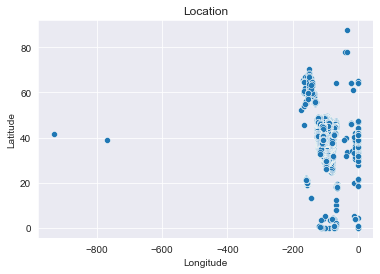

In [22]:
sns.scatterplot(x='longitude',y='latitude', data= merged_df )
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [23]:
#Select Latitude and longitude values to drop outside the US vicinity 
to_drop = merged_df.loc[(merged_df['longitude'] < -167) | (merged_df['longitude'] > -50) | (merged_df['latitude'] < 20)]
to_drop.head()

state           str_id deck_type wearing_type membrane_type  \
0    '1 - Alabama'  080103000001007       'N'          'N'           'N'   
1    '1 - Alabama'  080106000001009       'N'          'N'           'N'   
2    '1 - Alabama'  020222                'N'          'N'           'N'   
3    '1 - Alabama'  021152                '1'          '0'           '0'   
187  '1 - Alabama'  DAPTRARUC025465       '2'          '0'           '0'   

    deck_protection toll  freeze_thaw_cycle  snowfall_days  \
0               'N'  '3'                NaN            NaN   
1               'N'  '3'                NaN            NaN   
2               'N'  '3'                6.0            8.0   
3               '0'  '3'                NaN            NaN   
187             '0'  '3'               16.0            1.0   

                       county  avg_daily_trfc         design_material  \
0    '039 - Covington County'            50.0              'Concrete'   
1         '027 - Clay County'            50.0                 'Steel'   
2       '061 - Geneva County'          1120.0              'Concrete'   
3    '073 - Jefferson County'          2017.0  'Prestressed Concrete'   
187       '045 - Dale County'            10.0              'Concrete'   

     num_spans  structure_length bridge_condition  bridge_age  latitude  \
0          2.0              21.0           'Good'        45.0   0.00000   
1          2.0              24.9           'Fair'        40.0   0.00000   
2          3.0              24.9           'Good'         7.0  31.10981   
3          1.0              75.1           'Good'         4.0  33.52243   
187        1.0              34.1           'Good'        31.0  31.37200   

     longitude mnt_respons  yr_reconst  skew  max_span  bridge_width  \
0     0.000000        '64'         0.0  20.0       0.0           0.0   
1     0.000000        '64'         0.0  45.0       0.0           0.0   
2    -9.024917         '1'         0.0   0.0       7.9           0.0   
3   -33.522430         '1'         0.0   0.0      75.1          24.9   
187   0.000000        '74'         0.0   0.0      34.1          14.4   

     deck_width super_st_condition sub_st_condition deck_condition  
0           0.0                'N'              'N'            'N'  
1           0.0                'N'              'N'            'N'  
2           0.0                'N'              'N'            'N'  
3          27.6                '9'              '9'            '9'  
187        16.4                '7'              '7'            '7'

In [24]:
merged_df.drop(to_drop.index, axis=0, inplace=True)

Text(0, 0.5, 'Latitude')

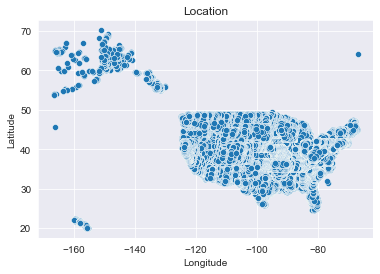

In [25]:
sns.scatterplot(x='longitude',y='latitude', data= merged_df )
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [26]:
to_drop = merged_df.loc[(merged_df['latitude'] < 55) & (merged_df['longitude'] < -163) |
                        (merged_df['latitude'] > 50) & (merged_df['longitude'] > -80) ]

In [27]:
merged_df.drop(to_drop.index, axis=0, inplace=True)

Text(0, 0.5, 'Latitude')

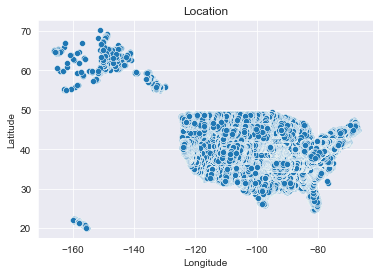

In [28]:
sns.scatterplot(x='longitude',y='latitude', data= merged_df )
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### Removing unwanted characters from State

In [29]:
# #iterate over columns to remove qoutes
merged_df = merged_df.applymap(lambda x: x.replace("'", '') if (isinstance(x, str)) else x)

In [30]:
#remove quotes from state
merged_df['state'] = merged_df['state'].map(lambda x: x.lstrip(''))

In [31]:
merged_df.state

4             1 - Alabama
5             1 - Alabama
6             1 - Alabama
7             1 - Alabama
8             1 - Alabama
               ...       
617122    9 - Connecticut
617123    9 - Connecticut
617124    9 - Connecticut
617125    9 - Connecticut
617126    9 - Connecticut
Name: state, Length: 612944, dtype: object

In [32]:
#remove numbers and characters from 'state'
merged_df['state'] = merged_df['state'].replace('[0123456789-]', '', regex=True)

In [33]:
merged_df.head()

state           str_id deck_type wearing_type membrane_type  \
4    Alabama  021480                  1            0             0   
5    Alabama  009763                  N            6             0   
6    Alabama  003324                  N            N             N   
7    Alabama  006369                  1            0             0   
8    Alabama  015078                  2            0             0   

  deck_protection toll  freeze_thaw_cycle  snowfall_days  \
4               0    3               14.0            0.0   
5               0    3               14.0            0.0   
6               N    3               14.0            0.0   
7               0    3               14.0            0.0   
8               0    3               14.0            0.0   

                 county  avg_daily_trfc      design_material  num_spans  \
4  069 - Houston County          4940.0     Steel Continuous        3.0   
5  069 - Houston County           280.0             Concrete        3.0   
6  069 - Houston County           420.0             Concrete        3.0   
7  069 - Houston County           420.0  Concrete Continuous        3.0   
8  069 - Houston County            70.0             Concrete        3.0   

   structure_length bridge_condition  bridge_age  latitude  longitude  \
4             955.1             Good        15.0  31.12305  -85.05527   
5              52.5             Fair        53.0  31.05112  -85.09267   
6              25.3             Good        73.0  31.17840  -85.11512   
7             399.0             Fair        63.0  31.18900  -85.11860   
8              44.9             Fair        31.0  31.10713  -85.17017   

  mnt_respons  yr_reconst  skew  max_span  bridge_width  deck_width  \
4           1         0.0  23.0     274.9          38.1        41.0   
5           2         0.0  45.0      12.1           0.0         0.0   
6           2      2009.0   0.0       7.9           0.0         0.0   
7           2         0.0   0.0      60.0          23.6        27.6   
8           2         0.0   0.0      15.1          23.6        24.9   

  super_st_condition sub_st_condition deck_condition  
4                  7                7              7  
5                  N                N              N  
6                  N                N              N  
7                  7                7              6  
8                  5                6              5

### Removing irrelevant characters in Bridge condition

In [34]:
# Get a list of the top 3 bridge_conditions
top3 = merged_df['bridge_condition'].value_counts()[:3].index

# At locations where the neighborhood is NOT in the top 3, 
# replace the brdige_condition with 'NA'
merged_df.loc[np.logical_not(merged_df['bridge_condition'].isin(top3)), 'bridge_condition'] = np.nan

In [35]:
merged_df.bridge_condition.value_counts()

Fair    283972
Good    269676
Poor     43267
Name: bridge_condition, dtype: int64

In [36]:
merged_df.bridge_condition.value_counts(normalize=True)

Fair    0.475733
Good    0.451783
Poor    0.072484
Name: bridge_condition, dtype: float64

### Dealing with missing values

We will be dropping the rows with missing locational data since they would be irrelevant if we can't locate them on the map.

In [37]:
# Drop rows which contain any NaN value in the selected columns
mod_df = merged_df.dropna( how='any',
                    subset=['latitude', 'longitude', 'mnt_respons',
                            'skew', 'max_span', 'bridge_width', 'deck_width',
                            'super_st_condition', 'sub_st_condition', 'deck_condition'
                           ])

In [38]:
# fill 'avg_daily_trfc' and 'num_spans' missing values using random choic

s = mod_df.avg_daily_trfc.value_counts(normalize=True)
mod_df['avg_daily_trfic'] =mod_df['avg_daily_trfc']
mod_df.loc[mod_df.avg_daily_trfc.isna(),
           'avg_daily_trfic'] = np.random.choice(s.index, p=s.values, size=mod_df.avg_daily_trfc.isna().sum())

In [39]:
#drop the original 'avg_daily_trfc' column
mod_df.drop('avg_daily_trfc', axis=1, inplace=True)

In [40]:
# Replace missing values in yr_reconst by 0 assuming they have never been reconstructed
cols = ['yr_reconst', 'freeze_thaw_cycle', 'snowfall_days']
for col in cols:
    mod_df[col].fillna(value=0, inplace=True)


In [41]:
mod_df.isna().sum()

state                     0
str_id                    0
deck_type                 0
wearing_type              0
membrane_type             0
deck_protection           0
toll                      0
freeze_thaw_cycle         0
snowfall_days             0
county                15327
design_material       15327
num_spans             15327
structure_length      15327
bridge_condition      15327
bridge_age            15327
latitude                  0
longitude                 0
mnt_respons               0
yr_reconst                0
skew                      0
max_span                  0
bridge_width              0
deck_width                0
super_st_condition        0
sub_st_condition          0
deck_condition            0
avg_daily_trfic           0
dtype: int64

Referring to the National Bridge Inventory the Deck condition ranges from 0 to 9, with 0 signifying a failed structure and 9 being excellent condition of the structure, let's replace the character "N" with NAN and treat it as a missing value. 

In [42]:
cond_cols = ['deck_condition', 'sub_st_condition', 'super_st_condition']

for col in cond_cols:
    print(mod_df[col].value_counts())
    print('=======================')
    mod_df[col] = mod_df[col].replace({'N': np.nan}, regex=True)
    print(mod_df[col].value_counts())

7    197043
N    146331
6    117142
8     63108
5     57169
4     12590
9     11212
3      2209
0       797
2       403
1        78
Name: deck_condition, dtype: int64
7    197043
6    117142
8     63108
5     57169
4     12590
9     11212
3      2209
0       797
2       403
1        78
Name: deck_condition, dtype: int64
7    182534
N    140982
6    113561
8     73349
5     62339
4     17261
9     11684
3      4168
2      1163
0       783
1       258
Name: sub_st_condition, dtype: int64
7    182534
6    113561
8     73349
5     62339
4     17261
9     11684
3      4168
2      1163
0       783
1       258
Name: sub_st_condition, dtype: int64
7    176653
N    140814
6    110851
8     88418
5     58377
4     14565
9     13968
3      2838
0       795
2       599
1       204
Name: super_st_condition, dtype: int64
7    176653
6    110851
8     88418
5     58377
4     14565
9     13968
3      2838
0       795
2       599
1       204
Name: super_st_condition, dtype: int64


In [43]:
#drop the nan values in 'bridge_condition'
mod_df.dropna(inplace=True)

In [44]:
#change datatype of continuous variables to numeric values
to_numeric = ['avg_daily_trfic','num_spans','structure_length', 'bridge_age', 'freeze_thaw_cycle']

for col in to_numeric:
      mod_df[col] = pd.to_numeric(mod_df[col], errors='coerce')
    
  

## Visualization

### Super structure condition

In [45]:
quantity_df = mod_df.groupby('super_st_condition')['bridge_condition'].value_counts().unstack()

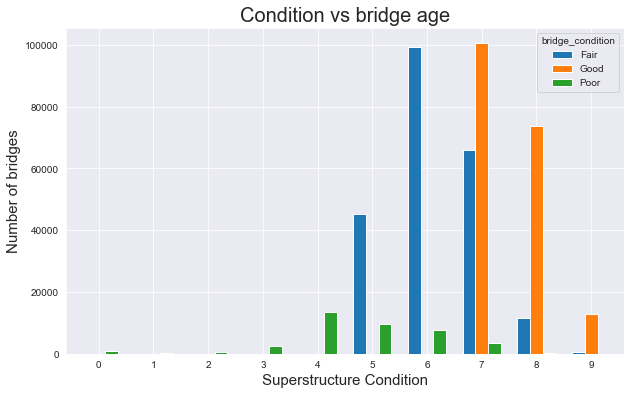

In [46]:
quantity_df.plot.bar(figsize = (10, 6), width=0.7)
plt.title('Condition vs bridge age', fontsize=20)
plt.xlabel('Superstructure Condition', fontsize=15)
plt.ylabel('Number of bridges', fontsize=15)
plt.xticks(rotation = 0);

In [47]:
mod_df.columns

Index(['state', 'str_id', 'deck_type', 'wearing_type', 'membrane_type',
       'deck_protection', 'toll', 'freeze_thaw_cycle', 'snowfall_days',
       'county', 'design_material', 'num_spans', 'structure_length',
       'bridge_condition', 'bridge_age', 'latitude', 'longitude',
       'mnt_respons', 'yr_reconst', 'skew', 'max_span', 'bridge_width',
       'deck_width', 'super_st_condition', 'sub_st_condition',
       'deck_condition', 'avg_daily_trfic'],
      dtype='object')

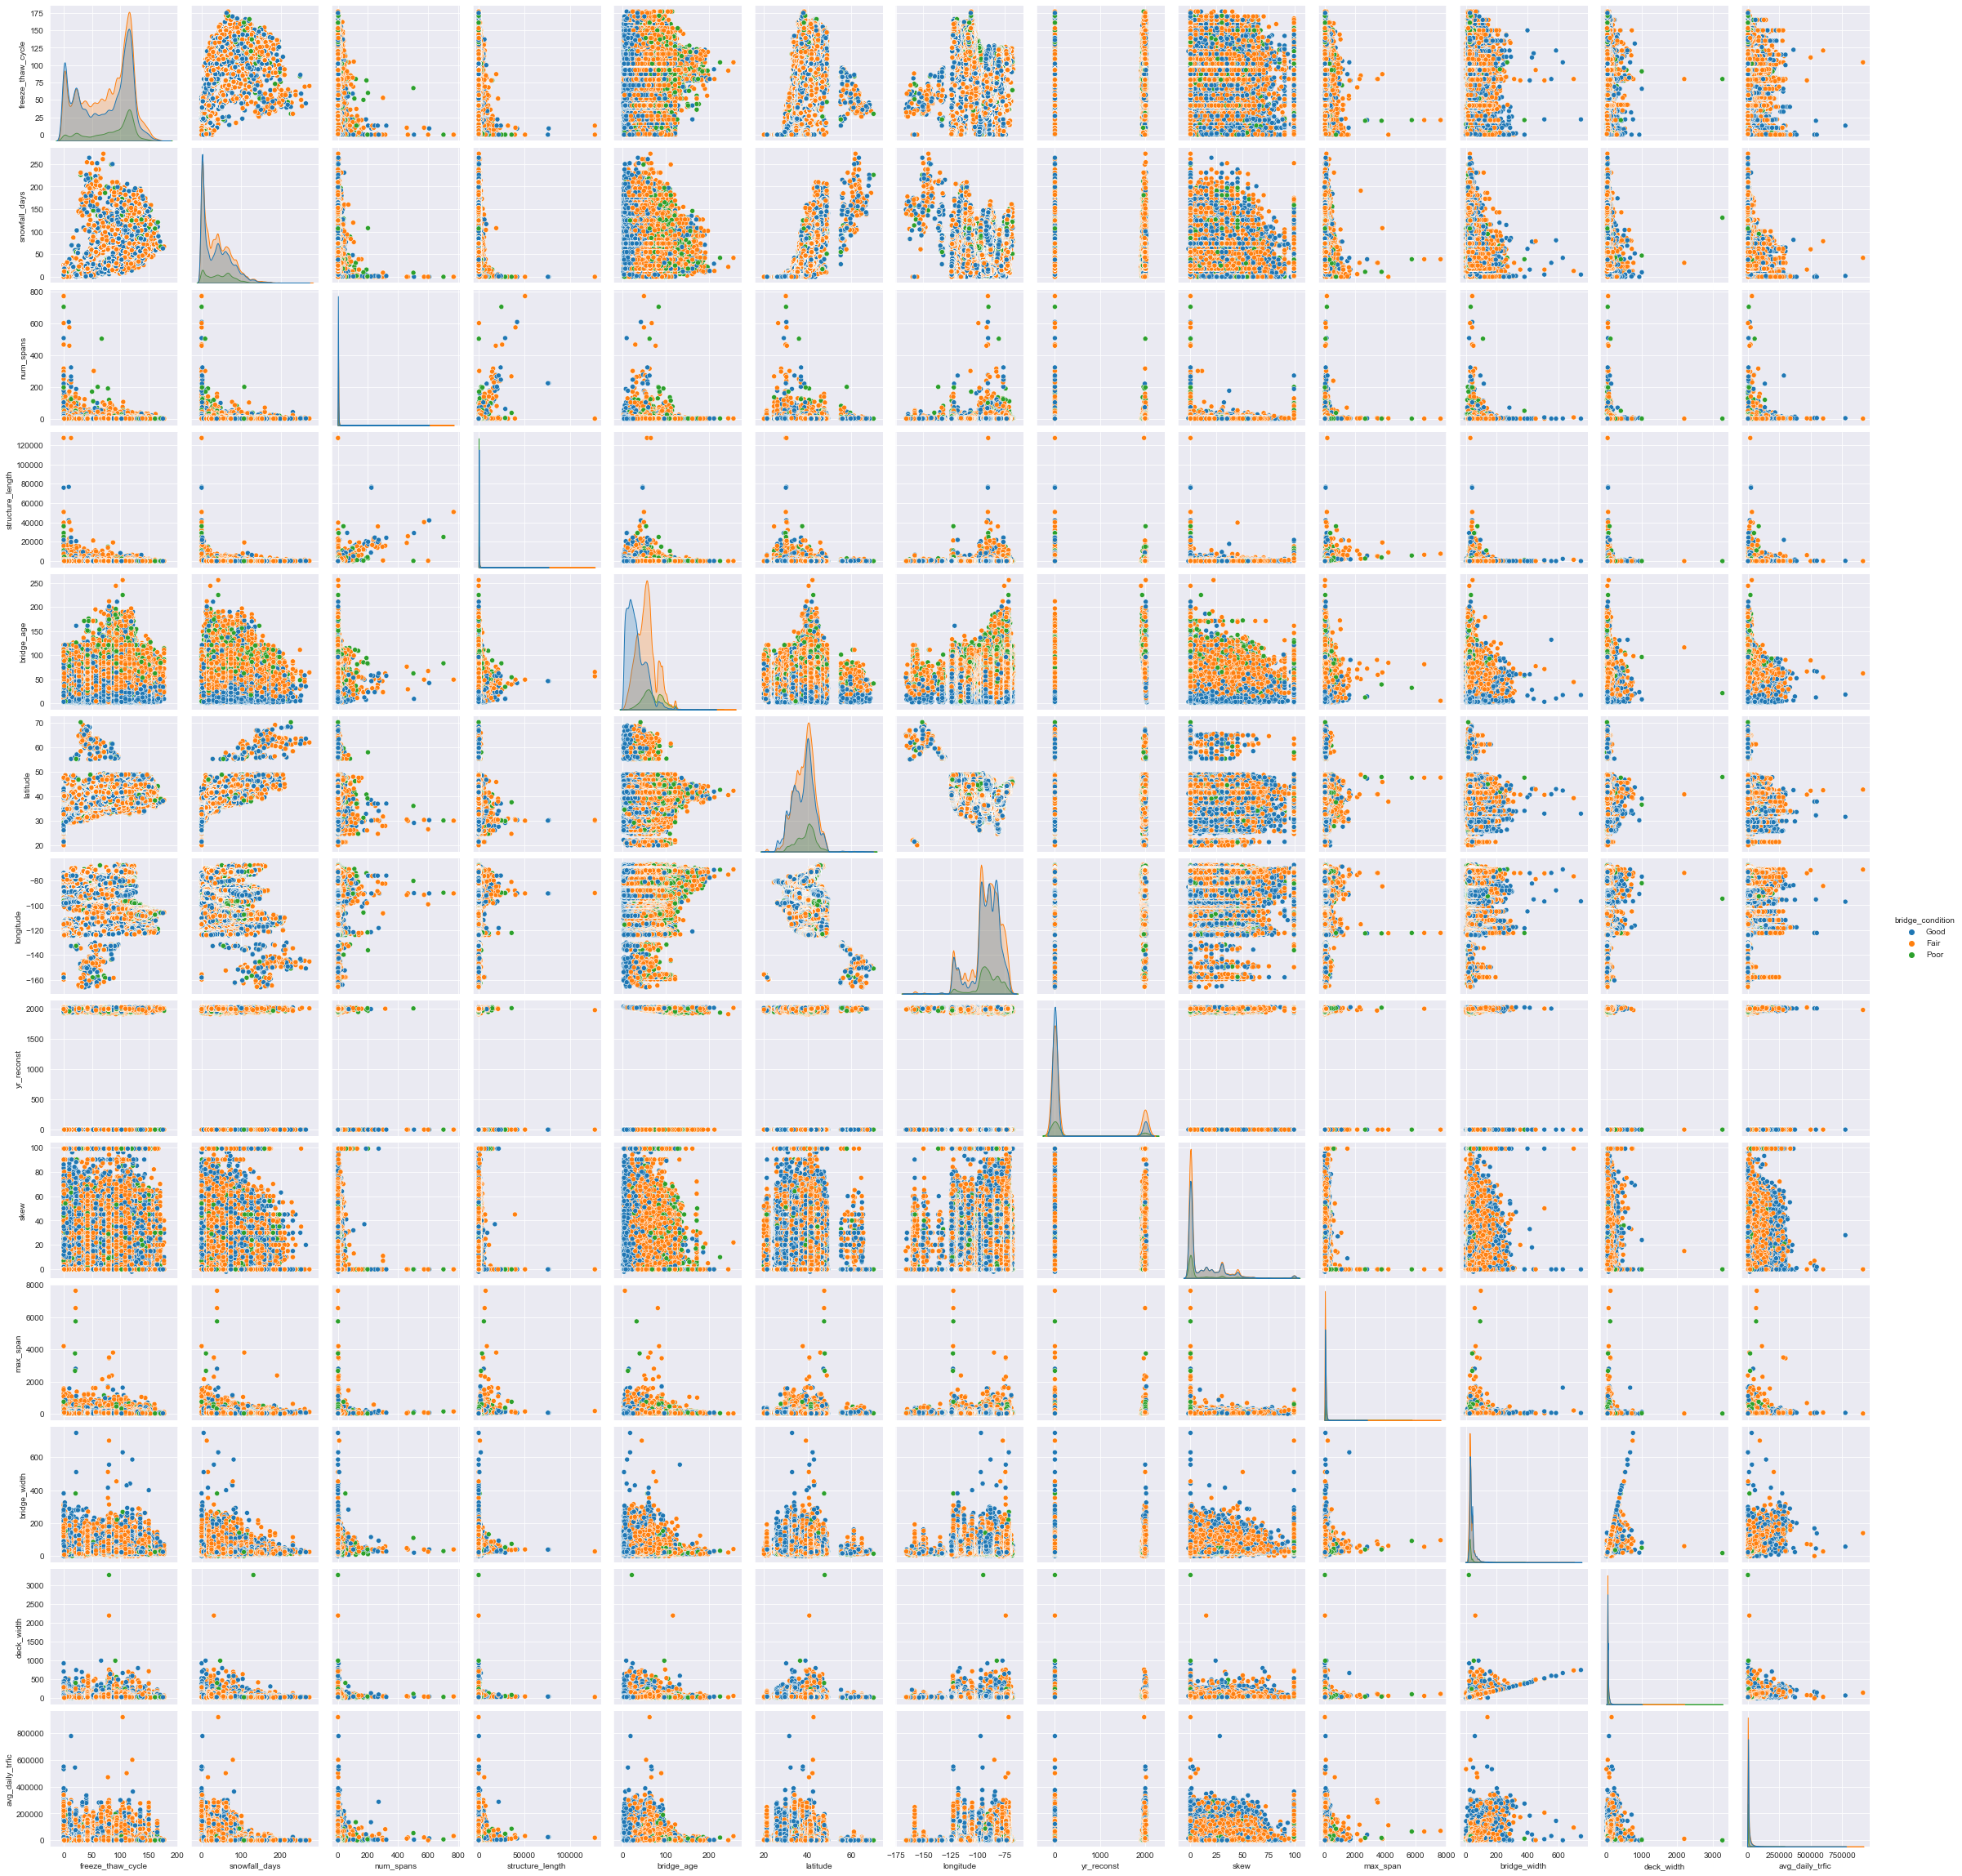

In [48]:
sns.pairplot(mod_df, hue='bridge_condition')

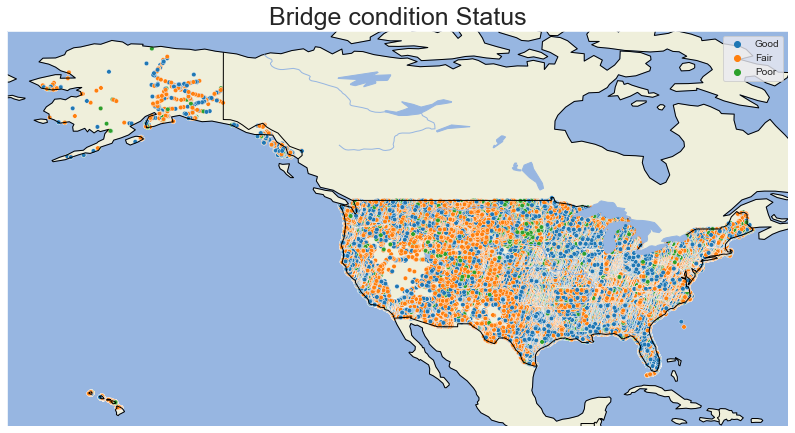

In [49]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.figure(figsize=(14,10))

# Creates the map
ca_map = plt.axes(projection=ccrs.PlateCarree())

ca_map.add_feature(cfeature.LAND)
ca_map.add_feature(cfeature.OCEAN)
ca_map.add_feature(cfeature.COASTLINE)
ca_map.add_feature(cfeature.BORDERS, linestyle='-')
ca_map.add_feature(cfeature.LAKES)
ca_map.add_feature(cfeature.RIVERS)
# ca_map.add_feature(cfeature.STATES.with_scale('10m'))


# Plots the data onto map
sns.scatterplot(mod_df['longitude'], mod_df['latitude'], 
            s=20,
            hue=mod_df['bridge_condition'],
            transform=ccrs.PlateCarree())

# Plot labels
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('Bridge condition Status', fontsize=25)
plt.legend()
plt.show()

In [50]:
mod_df.to_csv('bridge_data_cleaned', index=False)

# Creating Dummies

In [51]:
mod_df.columns

Index(['state', 'str_id', 'deck_type', 'wearing_type', 'membrane_type',
       'deck_protection', 'toll', 'freeze_thaw_cycle', 'snowfall_days',
       'county', 'design_material', 'num_spans', 'structure_length',
       'bridge_condition', 'bridge_age', 'latitude', 'longitude',
       'mnt_respons', 'yr_reconst', 'skew', 'max_span', 'bridge_width',
       'deck_width', 'super_st_condition', 'sub_st_condition',
       'deck_condition', 'avg_daily_trfic'],
      dtype='object')

In [52]:
#separate the features into target, categorical and continuous variables
target = ['bridge_condition']

categorical = ['deck_type', 'wearing_type', 'membrane_type', 'deck_protection',
               'toll', 'design_material', 'mnt_respons']

continuous = ['freeze_thaw_cycle', 'snowfall_days', 'structure_length', 'bridge_age',
              'latitude', 'longitude', 'yr_reconst', 'skew',
              'max_span', 'bridge_width', 'deck_width', 'avg_daily_trfic', 'num_spans']

to_drop = ['state', 'str_id','super_st_condition', 'sub_st_condition', 'deck_condition', 'county']

In [53]:
# print number of classes in each category
for col in categorical:
    print(col, mod_df[col].value_counts().count())

deck_type 10
wearing_type 11
membrane_type 7
deck_protection 10
toll 5
design_material 9
mnt_respons 35


In [54]:
mod_df.drop(to_drop+target+continuous, axis=1).columns

Index(['deck_type', 'wearing_type', 'membrane_type', 'deck_protection', 'toll',
       'design_material', 'mnt_respons'],
      dtype='object')

In [55]:
df_dummies = pd.get_dummies(mod_df.drop(to_drop+target, axis=1))
df_dummies.head()

freeze_thaw_cycle  snowfall_days  num_spans  structure_length  bridge_age  \
4                14.0            0.0        3.0             955.1        15.0   
7                14.0            0.0        3.0             399.0        63.0   
8                14.0            0.0        3.0              44.9        31.0   
10               14.0            0.0        4.0             136.2        50.0   
11               14.0            0.0       11.0             451.1        36.0   

    latitude  longitude  yr_reconst  skew  max_span  bridge_width  deck_width  \
4   31.12305  -85.05527         0.0  23.0     274.9          38.1        41.0   
7   31.18900  -85.11860         0.0   0.0      60.0          23.6        27.6   
8   31.10713  -85.17017         0.0   0.0      15.1          23.6        24.9   
10  31.05421  -85.20689         0.0   0.0      34.1          24.0        27.2   
11  31.01672  -85.22263         0.0   0.0      41.0          40.0        42.7   

    avg_daily_trfic  deck_type_1  deck_type_2  deck_type_3  deck_type_4  \
4            4940.0            1            0            0            0   
7             420.0            1            0            0            0   
8              70.0            0            1            0            0   
10            340.0            1            0            0            0   
11           1980.0            1            0            0            0   

    deck_type_5  deck_type_6  deck_type_7  deck_type_8  deck_type_9  \
4             0            0            0            0            0   
7             0            0            0            0            0   
8             0            0            0            0            0   
10            0            0            0            0            0   
11            0            0            0            0            0   

    deck_type_N  wearing_type_0  wearing_type_1  wearing_type_2  \
4             0               1               0               0   
7             0               1               0               0   
8             0               1               0               0   
10            0               1               0               0   
11            0               1               0               0   

    wearing_type_3  wearing_type_4  wearing_type_5  wearing_type_6  \
4                0               0               0               0   
7                0               0               0               0   
8                0               0               0               0   
10               0               0               0               0   
11               0               0               0               0   

    wearing_type_7  wearing_type_8  wearing_type_9  wearing_type_N  \
4                0               0               0               0   
7                0               0               0               0   
8                0               0               0               0   
10               0               0               0               0   
11               0               0               0               0   

    membrane_type_0  membrane_type_1  membrane_type_2  membrane_type_3  \
4                 1                0                0                0   
7                 1                0                0                0   
8                 1                0                0                0   
10                1                0                0                0   
11                1                0                0                0   

    membrane_type_8  membrane_type_9  membrane_type_N  deck_protection_0  \
4                 0                0                0                  1   
7                 0                0                0                  1   
8                 0                0                0                  1   
10                0                0                0                  1   
11                0                0                0                  1   

    d

In [56]:
df_dummies.shape

(449247, 100)

In [57]:
df_dummies['bridge_condition'] = mod_df['bridge_condition']

In [58]:
df_dummies.head()

freeze_thaw_cycle  snowfall_days  num_spans  structure_length  bridge_age  \
4                14.0            0.0        3.0             955.1        15.0   
7                14.0            0.0        3.0             399.0        63.0   
8                14.0            0.0        3.0              44.9        31.0   
10               14.0            0.0        4.0             136.2        50.0   
11               14.0            0.0       11.0             451.1        36.0   

    latitude  longitude  yr_reconst  skew  max_span  bridge_width  deck_width  \
4   31.12305  -85.05527         0.0  23.0     274.9          38.1        41.0   
7   31.18900  -85.11860         0.0   0.0      60.0          23.6        27.6   
8   31.10713  -85.17017         0.0   0.0      15.1          23.6        24.9   
10  31.05421  -85.20689         0.0   0.0      34.1          24.0        27.2   
11  31.01672  -85.22263         0.0   0.0      41.0          40.0        42.7   

    avg_daily_trfic  deck_type_1  deck_type_2  deck_type_3  deck_type_4  \
4            4940.0            1            0            0            0   
7             420.0            1            0            0            0   
8              70.0            0            1            0            0   
10            340.0            1            0            0            0   
11           1980.0            1            0            0            0   

    deck_type_5  deck_type_6  deck_type_7  deck_type_8  deck_type_9  \
4             0            0            0            0            0   
7             0            0            0            0            0   
8             0            0            0            0            0   
10            0            0            0            0            0   
11            0            0            0            0            0   

    deck_type_N  wearing_type_0  wearing_type_1  wearing_type_2  \
4             0               1               0               0   
7             0               1               0               0   
8             0               1               0               0   
10            0               1               0               0   
11            0               1               0               0   

    wearing_type_3  wearing_type_4  wearing_type_5  wearing_type_6  \
4                0               0               0               0   
7                0               0               0               0   
8                0               0               0               0   
10               0               0               0               0   
11               0               0               0               0   

    wearing_type_7  wearing_type_8  wearing_type_9  wearing_type_N  \
4                0               0               0               0   
7                0               0               0               0   
8                0               0               0               0   
10               0               0               0               0   
11               0               0               0               0   

    membrane_type_0  membrane_type_1  membrane_type_2  membrane_type_3  \
4                 1                0                0                0   
7                 1                0                0                0   
8                 1                0                0                0   
10                1                0                0                0   
11                1                0                0                0   

    membrane_type_8  membrane_type_9  membrane_type_N  deck_protection_0  \
4                 0                0                0                  1   
7                 0                0                0                  1   
8                 0                0                0                  1   
10                0                0                0                  1   
11                0                0                0                  1   

    d

In [59]:
df_dummies.bridge_condition.value_counts(normalize=True)

Fair    0.496446
Good    0.416535
Poor    0.087019
Name: bridge_condition, dtype: float64

# Modeling

In [60]:
# assign variables for features and target 
X = df_dummies.drop('bridge_condition', axis = 1)
y = df_dummies['bridge_condition']

In [61]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=df_dummies['bridge_condition'], random_state = 42)

# KNN

In [62]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

models = []
def get_metrics(y_test, X_test, model):
    labels = y_test.to_numpy()
    preds = model.predict(X_test)
    
    metrics = {}
    metrics['accuracy'] = accuracy_score(labels, preds)
    metrics['f1'] = f1_score(labels, preds, average='macro')
    metrics['precision'] = precision_score(labels, preds, average='macro')
    metrics['recall'] = recall_score(labels, preds, average='macro')
    
    return metrics

## Baseline model

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, knn)
# metrics['name'] = 'K Nearest Neighbors Baseline'
# models.append(metrics)

In [64]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

        Fair       0.72      0.82      0.77    156118
        Good       0.78      0.76      0.77    130989
        Poor       0.71      0.28      0.40     27365

    accuracy                           0.75    314472
   macro avg       0.74      0.62      0.65    314472
weighted avg       0.75      0.75      0.74    314472



In [65]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.63      0.72      0.67     66909
        Good       0.67      0.65      0.66     56138
        Poor       0.46      0.17      0.25     11728

    accuracy                           0.64    134775
   macro avg       0.59      0.51      0.53    134775
weighted avg       0.63      0.64      0.63    134775



## Confusion matrix

<Figure size 432x360 with 0 Axes>

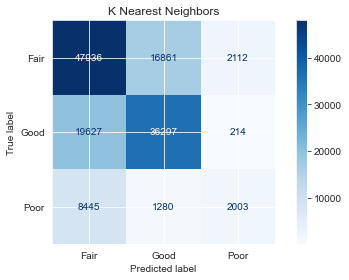

In [66]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

## Standardization

First scale the data. We scale the data after splitting the train and test data to avoid data leakage.

In [67]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler 


# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

freeze_thaw_cycle  snowfall_days  num_spans  structure_length  bridge_age  \
0           0.927767       0.606629  -0.347652         -0.066667    0.482819   
1           0.973511       0.907547   0.061302         -0.044188   -1.400218   
2          -1.199320      -1.089454   0.265779         -0.184777    0.136955   
3          -1.313679      -1.089454   0.470256          0.051443   -1.169642   
4          -0.924857      -1.062098  -0.347652         -0.167822   -1.553935   

   latitude  longitude  yr_reconst      skew  max_span  bridge_width  \
0  0.513664  -0.025610   -0.431078 -0.638404  1.531318     -0.892311   
1  1.002004  -0.304522   -0.431078  0.186047 -0.010375     -0.181033   
2 -1.274024   0.461223   -0.431078 -0.638404 -0.792931     -0.529105   
3 -1.558902   0.189804   -0.431078 -0.638404 -0.383114     -0.211300   
4 -0.887376   0.447033   -0.431078 -0.638404  0.495066     -0.165900   

   deck_width  avg_daily_trfic  deck_type_1  deck_type_2  deck_type_3  \
0   -0.860250        -0.369059    -1.571744    -0.403233    -0.072116   
1   -0.206853        -0.368135     0.636236    -0.403233    -0.072116   
2   -0.525384        -0.358664    -1.571744     2.479955    -0.072116   
3   -0.243607        -0.346191     0.636236    -0.403233    -0.072116   
4   -0.300779        -0.370214     0.636236    -0.403233    -0.072116   

   deck_type_4  deck_type_5  deck_type_6  deck_type_7  deck_type_8  \
0    -0.041819    -0.058376    -0.151248    -0.013105     3.607392   
1    -0.041819    -0.058376    -0.151248    -0.013105    -0.277209   
2    -0.041819    -0.058376    -0.151248    -0.013105    -0.277209   
3    -0.041819    -0.058376    -0.151248    -0.013105    -0.277209   
4    -0.041819    -0.058376    -0.151248    -0.013105    -0.277209   

   deck_type_9  deck_type_N  wearing_type_0  wearing_type_1  wearing_type_2  \
0    -0.162465    -0.136788       -0.414986       -0.719163       -0.199000   
1    -0.162465    -0.136788       -0.414986        1.390506       -0.199000   
2    -0.162465    -0.136788        2.409721       -0.719163       -0.199000   
3    -0.162465    -0.136788       -0.414986       -0.719163        5.025131   
4    -0.162465    -0.136788        2.409721       -0.719163       -0.199000   

   wearing_type_3  wearing_type_4  wearing_type_5  wearing_type_6  \
0        -0.16818       -0.140587       -0.140481       -0.672362   
1        -0.16818       -0.140587       -0.140481       -0.672362   
2        -0.16818       -0.140587       -0.140481       -0.672362   
3        -0.16818       -0.140587       -0.140481       -0.672362   
4        -0.16818       -0.140587       -0.140481       -0.672362   

   wearing_type_7  wearing_type_8  wearing_type_9  wearing_type_N  \
0        5.910978       -0.212583       -0.147319       -0.065196   
1       -0.169177       -0.212583       -0.147319       -0.065196   
2       -0.169177       -0.212583       -0.147319       -0.065196   
3       -0.169177       -0.212583       -0.147319       -0.065196   
4       -0.169177       -0.212583       -0.147319       -0.065196   

   membrane_type_0  membrane_type_1  membrane_type_2  membrane_type_3  \
0         0.578344        -0.159502        -0.191326        -0.096476   
1         0.578344        -0.159502        -0.191326        -0.096476   
2         0.578344        -0.159502        -0.191326        -0.096476   
3         0.578344        -0.159502        -0.191326        -0.096476   
4         0.578344        -0.159502        -0.191326        -0.096476   

   membrane_type_8  membrane_type_9  membrane_type_N  deck_protection_0  \
0        -0.386825        -0.110582        -0.201619           0.801531   
1        -0.386825        -0.110582        -0.201619          -1.247613   
2        -0.386825        -0.110582        -0.201619           0.801531   
3        -0.386825        -0.110582        -0.201619           0.801531   
4        -0.386825        -0.110582        -0.201619           0.801531   

   deck_protection_1  deck_protect

Now that you've preprocessed the data it's time to train a KNN classifier and validate its accuracy.

In [68]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the classifier
knn.fit(scaled_data_train, y_train);


# Predict on the test set

metrics = get_metrics(y_test, scaled_data_test, knn)
# metrics['name'] = 'K Nearest Neighbors scaled'
# models.append(metrics)

## Grid search CV

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {
    'n_neighbors': [1, 5, 9], # default 5
    'weights': ['uniform', 'distance'], # default 'uniform'
    'leaf_size': [30, 40], # default 30
    'p': [1, 2] # default 2
}

grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [30, 40], 'n_neighbors': [1, 5, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [71]:
grid_search.best_params_

{'leaf_size': 30, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [72]:
knn_tuned = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=30, p=1)
knn_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, knn_tuned)
# metrics['name'] = 'K Nearest Neighbors tuned'
# models.append(metrics)

{'accuracy': 0.7166685216100909,
 'f1': 0.615955616438599,
 'precision': 0.6597976888802172,
 'recall': 0.5978934682325003}

<Figure size 432x360 with 0 Axes>

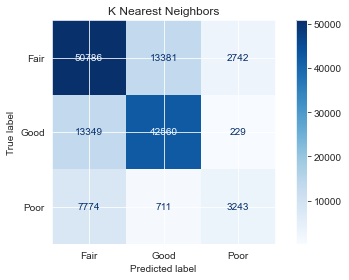

In [73]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn_tuned, scaled_data_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

## Smote

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

Fair    223027
Good    187127
Poor     39093
Name: bridge_condition, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

Fair    156118
Poor    156118
Good    156118
Name: bridge_condition, dtype: int64


In [77]:
knn_smote = KNeighborsClassifier(n_neighbors=9, weights='distance', 
                                 leaf_size=30, p=1)
knn_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, X_test, knn_smote)
# metrics['name'] = 'K Nearest Neighbors smote'
# models.append(metrics)

{'accuracy': 0.5936931923576331,
 'f1': 0.5391485733582563,
 'precision': 0.5380465995990522,
 'recall': 0.5963823312001605}

In [78]:
print(classification_report(y_train_resampled, knn_smote.predict(X_train_resampled)))

              precision    recall  f1-score   support

        Fair       1.00      1.00      1.00    156118
        Good       1.00      1.00      1.00    156118
        Poor       1.00      1.00      1.00    156118

    accuracy                           1.00    468354
   macro avg       1.00      1.00      1.00    468354
weighted avg       1.00      1.00      1.00    468354



In [79]:
print(classification_report(y_test, knn_smote.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.68      0.50      0.57     66909
        Good       0.69      0.71      0.70     56138
        Poor       0.24      0.58      0.34     11728

    accuracy                           0.59    134775
   macro avg       0.54      0.60      0.54    134775
weighted avg       0.65      0.59      0.61    134775



## Confusion matrix

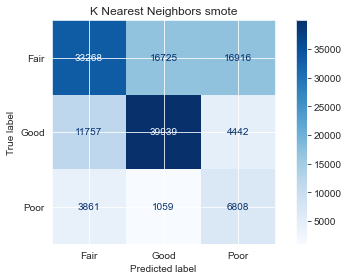

In [80]:
plot_confusion_matrix(knn_smote, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)
                                      
                     
plt.title('K Nearest Neighbors smote')
plt.tight_layout()

plt.show()

# Random Forest

## Baseline model

In [81]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=12)
forest.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, forest)
# metrics['name'] = 'Random Forest Baseline'
# models.append(metrics)

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,forest.predict(X_test))

array([[54857, 10527,  1525],
       [12401, 43660,    77],
       [ 8488,   383,  2857]], dtype=int64)

In [83]:
print(classification_report(y_train, forest.predict(X_train)))

              precision    recall  f1-score   support

        Fair       1.00      1.00      1.00    156118
        Good       1.00      1.00      1.00    130989
        Poor       1.00      1.00      1.00     27365

    accuracy                           1.00    314472
   macro avg       1.00      1.00      1.00    314472
weighted avg       1.00      1.00      1.00    314472



In [84]:
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.72      0.82      0.77     66909
        Good       0.80      0.78      0.79     56138
        Poor       0.64      0.24      0.35     11728

    accuracy                           0.75    134775
   macro avg       0.72      0.61      0.64    134775
weighted avg       0.75      0.75      0.74    134775



## Confusion Matrix

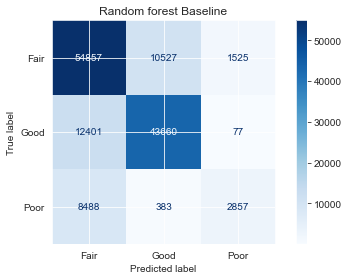

In [85]:
plot_confusion_matrix(forest, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)

plt.title('Random forest Baseline')
plt.tight_layout()

plt.show()

## Grid search

In [86]:
param_grid = {
    'n_estimators': [100, 200], # default 100 #boosting stages
    'max_depth': [30, 35, 40], # default None
    'max_features': [50, 60], # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
#     'min_samples_split' : [20,30,40],
#     'min_samples_leaf'  : [5, 10, 15]
    # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [87]:
grid_search.best_params_

{'max_depth': 40, 'max_features': 60, 'n_estimators': 200}

In [88]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=35,
                                      max_features=50, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(X_train, y_train)
get_metrics(y_test, X_test, forest_tuned)
# metrics['name'] = 'Random Forest tuned1'
# models.append(metrics)

{'accuracy': 0.7341866073084771,
 'f1': 0.5986917305116348,
 'precision': 0.7203835222855104,
 'recall': 0.5801317388847559}

In [89]:
print(classification_report(y_test, forest_tuned.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.70      0.82      0.76     66909
        Good       0.79      0.75      0.77     56138
        Poor       0.67      0.17      0.27     11728

    accuracy                           0.73    134775
   macro avg       0.72      0.58      0.60    134775
weighted avg       0.73      0.73      0.72    134775



## Smote

In [90]:
forest_smote = RandomForestClassifier(n_estimators=150, max_depth=40,
                                      max_features=50, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, scaled_data_test, forest_smote)
metrics['name'] = 'Random Forest smote'
models.append(metrics)

C:\Users\milen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
print(classification_report(y_test, forest_smote.predict(scaled_data_test)))

C:\Users\milen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Fair       0.00      0.00      0.00     66909
        Good       0.42      1.00      0.59     56138
        Poor       0.00      0.00      0.00     11728

    accuracy                           0.42    134775
   macro avg       0.14      0.33      0.20    134775
weighted avg       0.17      0.42      0.24    134775



## Feature importance

Text(0, 0.5, 'Features')

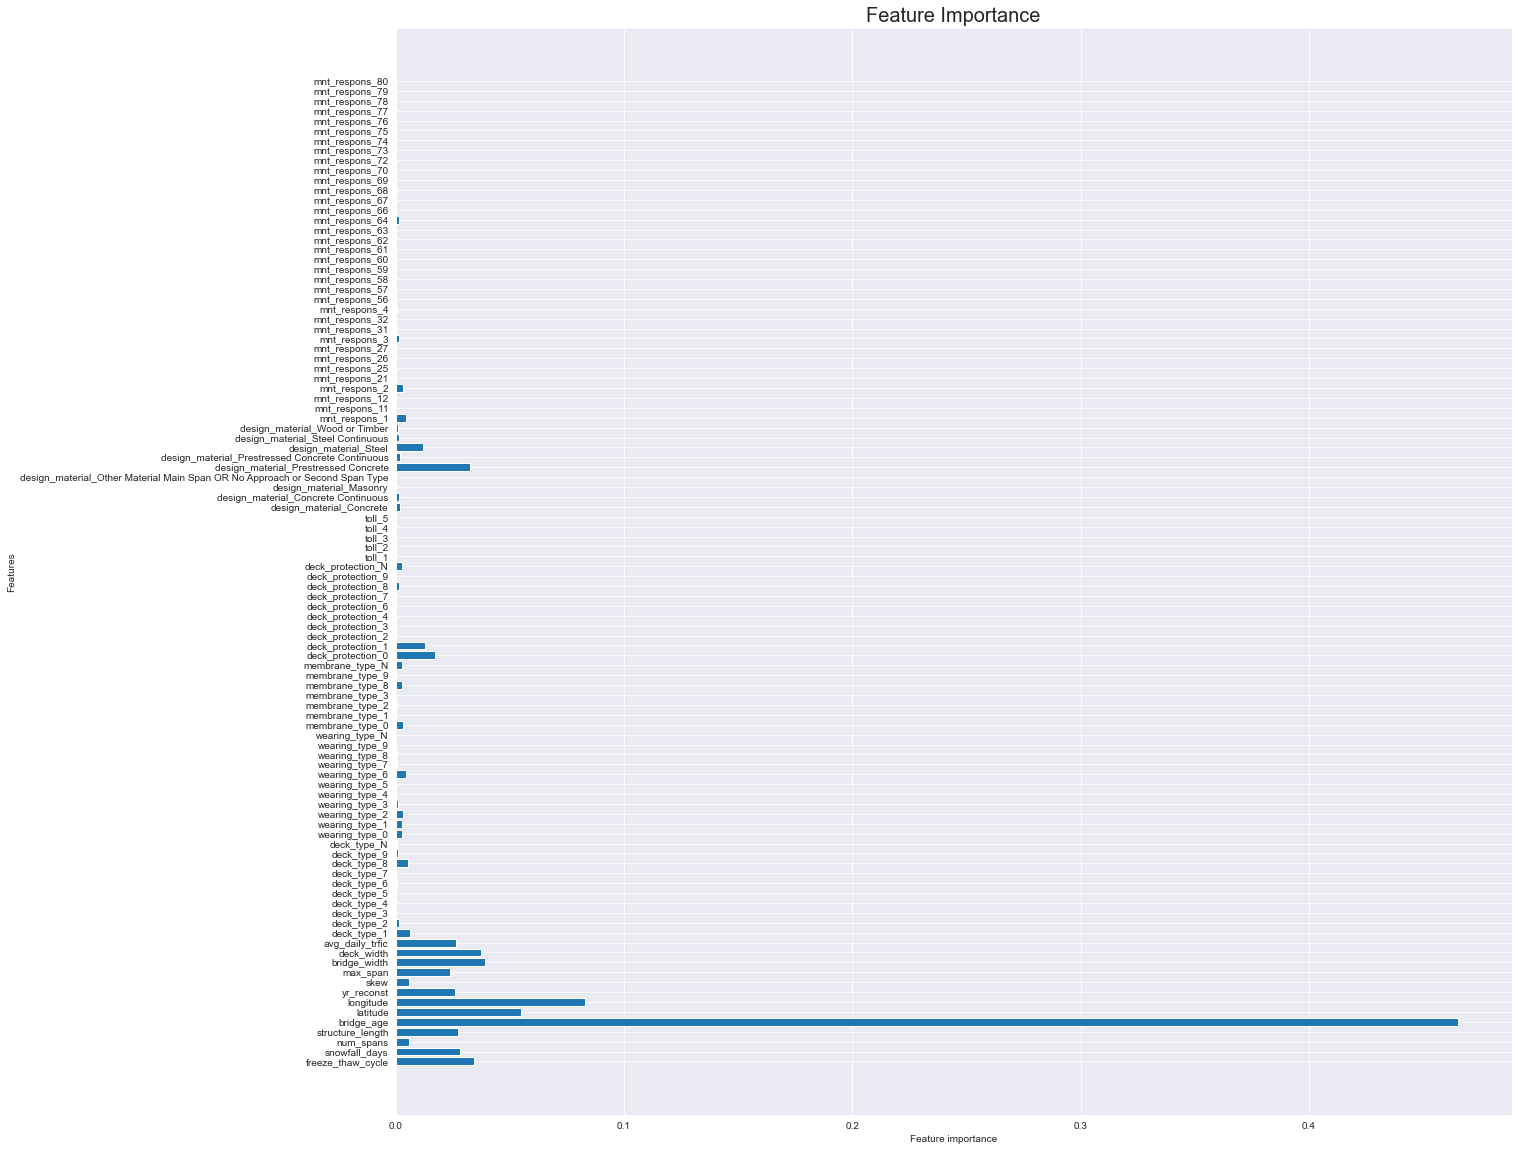

In [92]:
# Plot the feature importance of each feature
features = X_train.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(features), forest_tuned.feature_importances_, align='center')
plt.yticks(np.arange(features), X_train.columns.values)
plt.title('Feature Importance', fontsize=20)
plt.xlabel('Feature importance')
plt.ylabel('Features')

# XGBoost

## Baseline model

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate XGBClassifier and fit classifier
xgb = XGBClassifier(random_state=12, objective = 'multi:softprob')
xgb.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, xgb)
# metrics['name'] = 'XG Boost Baseline'
# models.append(metrics)

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [94]:
print(classification_report(y_train, xgb.predict(X_train)))

              precision    recall  f1-score   support

        Fair       0.72      0.83      0.77    156118
        Good       0.80      0.77      0.78    130989
        Poor       0.70      0.24      0.36     27365

    accuracy                           0.75    314472
   macro avg       0.74      0.61      0.64    314472
weighted avg       0.75      0.75      0.74    314472



In [95]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.70      0.81      0.75     66909
        Good       0.78      0.75      0.77     56138
        Poor       0.63      0.21      0.32     11728

    accuracy                           0.73    134775
   macro avg       0.71      0.59      0.61    134775
weighted avg       0.73      0.73      0.72    134775



## Confusion matrix

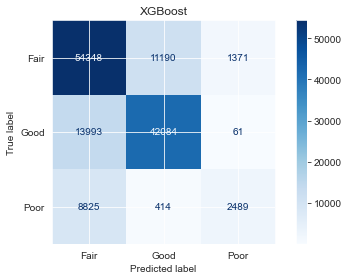

In [96]:
plot_confusion_matrix(xgb, X_test, y_test, 
                     values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('XGBoost')
plt.tight_layout()

plt.show()

# Neural Network

In [97]:
# Multiclass Classification with the Iris Flowers Dataset
# Import libraries
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility



seed = 7
numpy.random.seed(seed)

# load dataset

# dataset = df_dummies.values
# X = dataset[:,0:4].astype('float ')
# Y = dataset[:,4]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i . e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


#init = 'normal'

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=65, activation= 'relu'))
    model.add(Dense(3, activation= 'sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['f1 macro'])
    return model

estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=500, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print (" F1-score : %.2f %% (%.2f %%) " % (results.mean()*100, results.std()*100))

#Confusion matrix

C:\Users\milen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    C:\Users\milen\anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\milen\anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\milen\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\milen\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\milen\anaconda3\lib\site-packages\tensorflow\python\distribute\distribu

C:\Users\milen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    C:\Users\milen\anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\milen\anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\milen\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\milen\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\milen\anaconda3\lib\site-packages\tensorflow\python\distribute\distribu

 F1-score : nan % (nan %) 


C:\Users\milen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    C:\Users\milen\anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\milen\anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\milen\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\milen\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\milen\anaconda3\lib\site-packages\tensorflow\python\distribute\distribu